# Lab 6: Minimization

How to plot in 2D:
1. [Pyplot surface plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html)
2. [Example](https://matplotlib.org/stable/plot_types/3D/surface3d_simple.html#sphx-glr-plot-types-3d-surface3d-simple-py)

In [2]:
# IMPORTS
from scipy import linalg
import scipy.linalg as spl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib widget

## Exercise 1

### Part 1
Code the newton method for N-dimension

In [3]:
def newton(f, g, hf, x0, tol=1e-3, itmax=100):
    """
    Solves the system of equations f(x) = 0 using Newton's method.
    
    Args:
        f: A function that takes an N-dimensional vector as input and returns an N-dimensional vector.
        g: The Jacobian of f.
        hf: The Hessian of f.
        x0: The initial guess for the solution.
        tol: The tolerance for convergence. Defaults to 10^(-3)
        itmax: The maximum number of iterations. Defaults to 100
    Returns:
        (x_min, f(x_min), grad(x_min), iter)
    """
    x = x0.copy()
    for i in range(itmax):
        dx = linalg.solve(hf(x), g(x))
        x -= dx
        if np.allclose(g(x), 0, atol=tol, rtol=tol) or np.allclose(dx, 0, atol=tol, rtol=tol):
            break
    return x, f(x), np.linalg.norm(g(x)), i+1


### Part 2

Test your Newton's method

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
z = (1/4)*x**4 + (1/4)*y**4

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [4]:
x = np.array([1, 1], dtype=np.float64)

def f(x):
    return (1/4)*x[0]**4 + (1/4)*x[1]**4
def g(x): # Jacobian Matrix
    return np.array([x[0]**3, x[1]**3], dtype=np.float64)
def hf(x): # Hessian Matrix of f(x)
    return np.array([[3*x[0]**2, 0], [0, 3*x[1]**2]], dtype=np.float64)


minx, minf, grad, it = newton(f, g, hf, x, 0.001, 100)
print(f"Min x = {minx}\nMin value = {minf}\nGradient: {grad}\nIterations: {it}")


Min x = [0.0877915 0.0877915]
Min value = 2.9701596031774577e-05
Gradient: 0.0009569127359568552
Iterations: 6


Text(0, 0.5, 'Gradient')

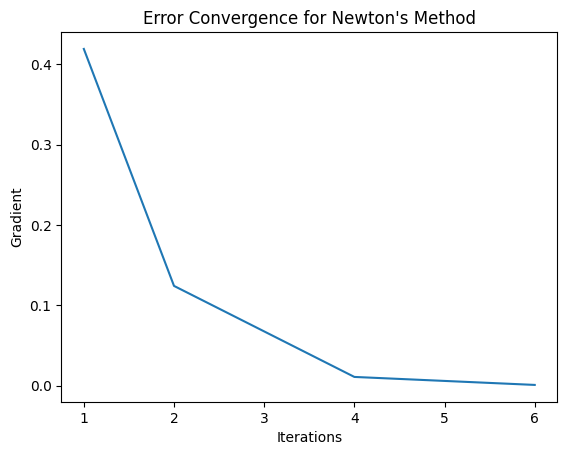

In [5]:
itmax_values = np.array([1, 2, 4, 8, 9])

grads = np.zeros_like(itmax_values, dtype=np.float64)
its = np.zeros_like(itmax_values)

for i, itmax in enumerate(itmax_values):
    # x = np.array([1, 1], dtype=np.float64)
    minx, minf, grad, it = newton(f, g, hf, x, 0.001, itmax)
    grads[i] = grad
    its[i] = it

plt.plot(its, grads)
plt.title("Error Convergence for Newton's Method")
plt.xlabel("Iterations")
plt.ylabel("Gradient")


## Exercise 2


### Part 1
Code the gradient descent method

In [6]:
# def Gradient(f,g,x0,tol,itmax,a):
#     for i in range(0,itmax):
#         xi = x0 - (a*g(x0))
#         if i == itmax or spl.norm(g(xi)) < tol:
#             break
#         x0 = xi
#     return xi, f(xi), spl.norm(g(xi)), i+1

def gradient(f, g, x0, tol, itmax: int, a):
  """
  Solves the system of equations f(x) = 0 using Gradient descent.

  Args:
    f: A function that takes an N-dimensional vector as input and returns an N-dimensional vector.
    g: The gradient of f.
    x0: The initial guess for the solution.
    tol: The tolerance for convergence.
    itmax: The maximum number of iterations.
    a: The learning rate.

  Returns:
    The solution to the system of equations.
  """
  x = x0.copy()
  for i in range(itmax):
    dx = -a * g(x)
    x += dx
    if np.allclose(g(x), 0, atol=tol, rtol=tol) or np.allclose(dx, 0, atol=tol, rtol=tol):
      break

  return x, f(x), np.linalg.norm(g(x)), i+1


In [11]:
# Original method:


def grad_descent(f, grad, x0, tol=1e-6, itmax=1000, a=0.01):
  x = x0.copy()
  for i in range(itmax):
    dx = -a * grad(x)
    x += dx
    if np.allclose(grad(x), 0, atol=tol, rtol=tol):
      break

  return x,f(x), np.linalg.norm(grad(x)), i+1


# New method:


def new_grad_descent(f, grad, x0, tol=1e-6, itmax=1000, a=0.01):
    x = x0.copy()
    f_prev = np.inf
    norm_grad_prev = np.inf
    for i in range(itmax):
        dx = -a * grad(x)
        x += dx
        f_val = np.linalg.norm(dx)
        norm_grad = np.linalg.norm(grad(x))
        if f_val >= f_prev or norm_grad >= norm_grad_prev:
            a *= 0.5
        f_prev = f_val
        norm_grad_prev = norm_grad
        if np.allclose(grad(x), 0, atol=tol, rtol=tol):
            break
    return x, f(x), np.linalg.norm(grad(x)), i+1


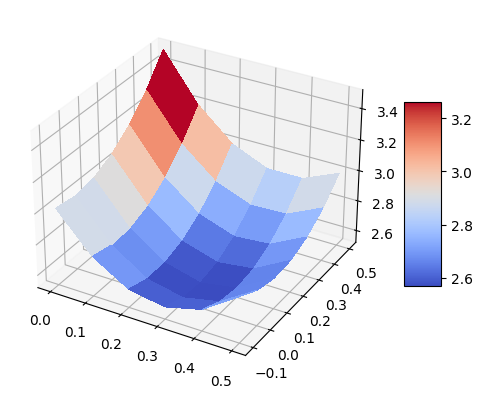

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(0, 0.6, 0.1), np.arange(-0.1, 0.6, 0.1))
z = 2*y**2 - x*y + 5 * x**2 - 3*x +3

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
# initial guess [0.2, 0.35]


In [33]:
import sympy as sp
x, y = sp.symbols("x y")


f = 2*y**2 - x*y + 5 * x**2 - 3*x + 3
sp.diff(f, x), sp.diff(f, y)


(10*x - y - 3, -x + 4*y)

In [43]:
x = np.array([0.2, 0.35], dtype=np.float64)


def f(x):
    return 2*x[1]**2 - x[0]*x[1] + 5 * x[0]**2 - 3*x[0] + 3


def g(x):  # Gradient
    return np.array([10*x[0] - x[1] - 3, -x[0] + 4*x[1]], dtype=np.float64)


minx1, minf1, grad1, it1 = grad_descent(f, g, x, 1e-6, 1000, 0.01)
print(f"Min x = {minx1}\nMin value = {minf1}\nGradient: {grad1}\nIterations: {it1}")

minx2, minf2, grad2, it2 = new_grad_descent(f, g, x, 1e-6, 1000, 0.01)
print(
    f"Min x = {minx2}\nMin value = {minf2}\nGradient: {grad2}\nIterations: {it2}")


Min x = [0.30769235 0.07692334]
Min value = 2.538461538461671
Gradient: 1.0084641058282513e-06
Iterations: 352
Min x = [0.30769235 0.07692334]
Min value = 2.538461538461671
Gradient: 1.0084641058282513e-06
Iterations: 352


### Part 2

Test your gradient descent method

In [25]:

x = np.array([1, 1], dtype=np.float64)


def f(x):
    return x[0]**4 + x[1]**2 - 5


def g(x):  # Gradient
    return np.array([4*x[0]**3, 2*x[1]], dtype=np.float64)



minx, minf, grad, it = gradient(f, g, x, 0.0001, 1000, 0.01)
print(f"Min x = {minx}\nMin value = {minf}\nGradient: {grad}\nIterations: {it}")


Min x = [1.35529376e-01 1.46332346e-06]
Min value = -4.999662608797905
Gradient: 0.009957729469438986
Iterations: 665


Text(0, 0.5, 'Gradient')

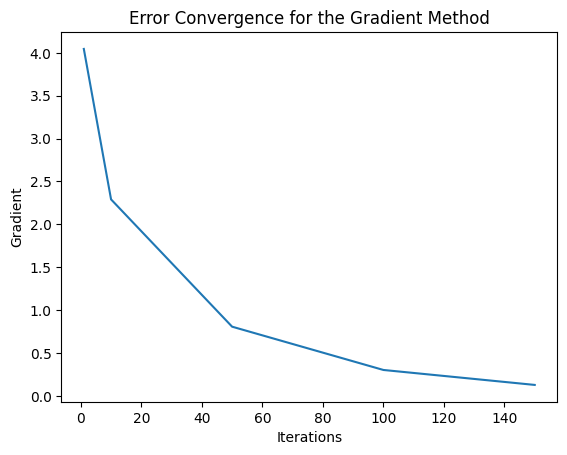

In [11]:
itmax_values = np.array([1, 10, 50, 100, 200, 300, 500, 1000])

grads = np.zeros_like(itmax_values, dtype=np.float64)
its = np.zeros_like(itmax_values)

for i, itmax in enumerate(itmax_values):
    x = np.array([1, 1], dtype=np.float64)
    minx, minf, grad, it = gradient(f, g, x, 0.001, itmax, 0.01)
    grads[i] = grad
    its[i] = it

plt.plot(its, grads)
plt.title("Error Convergence for the Gradient Method")
plt.xlabel("Iterations")
plt.ylabel("Gradient")


## Exercise 3

minimize using both method 

$$f(x)=3x^4 − 2x^2 + 1$$

Text(0, 0.5, '$f(x)$')

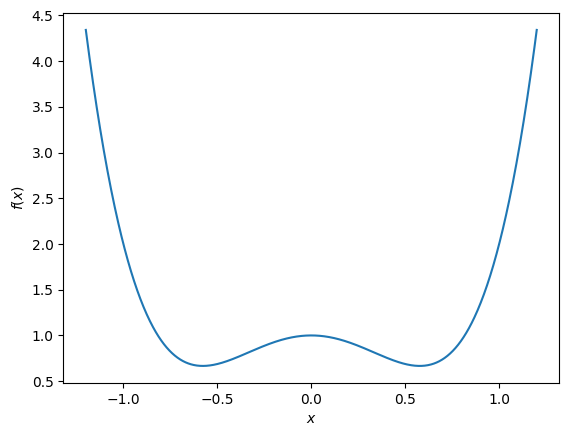

In [143]:
def f(x):
    return 3*x**4 - 2*x**2 + 1


def fp(x):
    return 12*x**3 - 4*x


def fp2(x):
    return 36*x**2 - 4


x = np.linspace(-1.2, 1.2, 1000)
# plt.ylim(0, 5)
plt.plot(x, f(x))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")


In [10]:
x = np.array([0.5, -0.5], dtype=np.float64)

for i, sol in enumerate(x):
    def f(x):
        return 3*x[i]**4 - 2*x[i]**2 + 1


    def g(x):
        return np.array([12*x[i]**3 - 4*x[i]])


    def hf(x):
        return np.array([36*x[i]**2 - 4])

    print(f"Solutions #{i+1}\n------------")
    minx, minf, grad, it = newton(f, g, hf, x, 1e-6, 1000)
    print(
        f"Newton's Method\nMin x = {minx[i]:.6}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")
    minx, minf, grad, it = gradient(f, g, x, 1e-6, 10000, 1/100)
    print(
        f"Gradient Method\nMin x = {minx[i]:.6}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")


Solutions #1
------------
Newton's Method
Min x = 0.57735
Min value = 0.666667
Gradient: 3.08924e-10
Iterations: 4

Gradient Method
Min x = 0.577339
Min value = 0.666667
Gradient: 8.85797e-05
Iterations: 109

Solutions #2
------------
Newton's Method
Min x = -0.57735
Min value = 0.666667
Gradient: 3.08924e-10
Iterations: 4

Gradient Method
Min x = -0.577339
Min value = 0.666667
Gradient: 8.85797e-05
Iterations: 109



## Exercise 4

 Minimize the function below using both method
$$D(x_1,x_2)=2x_1^2 + 2x_1x_2 + 2x_2^2 -\sqrt{6}x_1 $$

Text(0.5, 0, '$z$-axis')

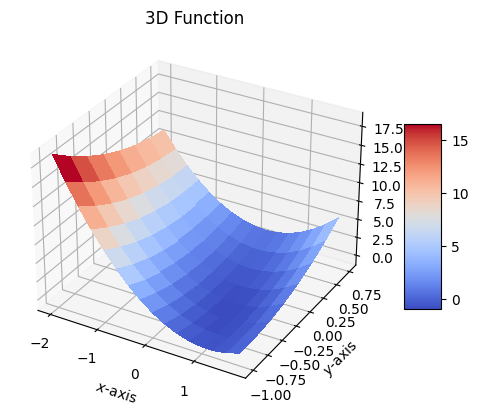

In [146]:
# figure, ax = plt.subplots(subplot_kw={"projection":"3d"})

# x = np.arange(-10, 10, 0.25)
# y = np.arange(-10, 10, 0.25)
# x,y = np.meshgrid(x,y)
# z = 2*x**2 + 2*y*x + 2*y**2 - np.sqrt(6)*x

# surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# figure.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-1, 1, 0.25))
z = 2*x**2 + 2*y*x + 2*y**2 - np.sqrt(6)*x

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("3D Function")
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
# x0 around 0.75, x1 maybe -0.25

$2 x^ 2 - 2x* sqrt(6) + y^ 2 z^ 2 + 10$

In [9]:
import sympy as sp
x1, x2 =  sp.symbols("x y")


f = x2 ** 2 - 2*x2 * np.sqrt(6) + x1 ** 2 + 10
sp.diff(f, x1), sp.diff(f, x2)



(2*x, 2*y - 4.89897948556636)

In [29]:
print(sp.diff(f, x,x), sp.diff(f, x, y), sp.diff(f, x, z))
print(sp.diff(f, y, x), sp.diff(f, y, y), sp.diff(f, y, z))
print(sp.diff(f, z, x), sp.diff(f, z, y), sp.diff(f, z, z))


4 0 0
0 2*z**2 4*y*z
0 4*y*z 2*y**2


In [17]:
def f(x):
    return x[1] ** 2 - 2*x[1] * np.sqrt(6) + x[0] ** 2 + 10


def g(x):
    return np.array([2*x[0], 2*x[1] - 2*np.sqrt(6)])

def hf(x):
    return np.array([[4, 0, 0], [0, 2*x[2]**2, 4*x[1]*x[2]], [0, 4*x[1]*x[2] , 2*x[1]**2]])


x = np.array([1.0, 1.0])

# minx, minf, grad, it = newton(f, g, hf, x, 1e-6, 1000)
# print(
#     f"Newton's Method\nMin x = {minx}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")
minx, minf, grad, it = new_grad_descent(f, g, x, 1e-8, 100000, 1/100)
print(
    f"Gradient Method\nMin x = {minx}\nMin value = {minf}\nGradient: {grad:.6}\nIterations: {it}\n")


Gradient Method
Min x = [3.41321027e-09 2.44948974e+00]
Min value = 4.000000000000002
Gradient: 1.20211e-08
Iterations: 965



In [16]:
def f(x):
    return 4*x[0]**2 + 2*x[0]*x[1]**2 + 3*x[1]**2 - np.sqrt(6)*x[1]


def g(x):
    return np.array([2*(4*x[0]+x[1]), 2*x[0]+6*x[1]-np.sqrt(6)])


def hf(x):
    return np.array([[4, 2], [2, 4]])


x = np.array([0.0, 0.0])

# minx, minf, grad, it = newton(f, g, hf, x, 1e-6, 1000)
# print(
#     f"Newton's Method\nMin x = {minx}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")
minx, minf, grad, it = gradient(f, g, x, 1e-8, 100000, 1/100)
print(
    f"Gradient Method\nMin x = {minx}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")

# minx, minf, grad, it = Newton(f, g, hf, x, 0.0001, 1000)
# print("Newton's Method")
# print("Min x =", minx)
# print("Min value =", minf)
# print("Gradient:", grad)
# print("Iterations:", it)


NameError: name 'gradient' is not defined

## Exercise 5

Minimize the function
    $$ f(x_1,x_2) = (1-2x_2)^2+(x_1-2x_2^2)^2-2$$

Text(0.5, 0.5, '$y$-axis')

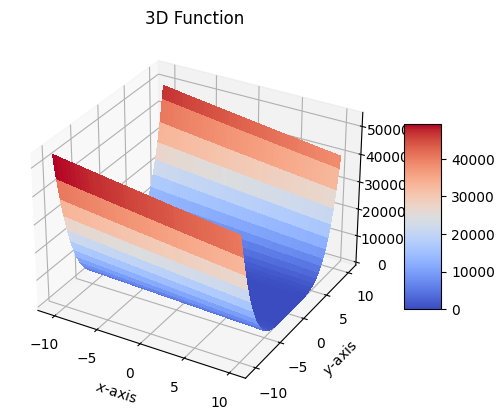

In [147]:
# figure, ax = plt.subplots(subplot_kw={"projection":"3d"})

# x = np.arange(-100, 100, 0.25)
# y = np.arange(-100, 100, 0.25)
# x,y = np.meshgrid(x,y)
# z = (1-2*y)**2 + (x-2*y**2)**2 - 2

# surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# figure.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(-10.5, 10.5, 0.25), np.arange(-10.5, 10.5, 0.25))
z = (1-2*y)**2 + (x-2*y**2)**2 - 2

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("3D Function")
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")

# not sure, try both at 0


In [110]:
# def Gradient(f,g,x0,tol,itmax,a):
#     for i in range(0,itmax):
#         xi = x0 - (a*g(x0))
#         if i == itmax or spl.norm(g(xi)) < tol:
#             break
#         x0 = xi
#     return xi, f(xi), spl.norm(g(xi)), i+1

def gradient(f, g, x0, tol, itmax: int, a):
  """
  Solves the system of equations f(x) = 0 using Gradient descent.

  Args:
    f: A function that takes an N-dimensional vector as input and returns an N-dimensional vector.
    g: The gradient of f.
    x0: The initial guess for the solution.
    tol: The tolerance for convergence.
    itmax: The maximum number of iterations.
    a: The learning, iter
  """
  x = x0.copy()
  for i in range(itmax):
    dx = -a * g(x)
    x += dx
    if np.allclose(g(x), 0, atol=tol, rtol=tol):
      break

  return x, f(x), np.linalg.norm(g(x)), i+1


In [122]:
def f(x):
    return (1-2*x[1])**2 + (x[0]-2*x[1]**2)**2 - 2



def g(x):
    return np.array([2 * (x[0] - 2 * x[1] ** 2), -4 - 8 * (-1 + x[0]) * x[1] + 16 * x[1] ** 3])

def hf(x):
    return np.array([[2, -8 * x[1]], [-8 * x[1], 8 + 32 * x[1] ** 2 - 8 * (x[0] - 2 * x[1] ** 2)]]
                    )


# [[2, -8 x[1]], [-8 x[1], 8 + 32 x[1] ** 2 - 8 (x[0] - 2 x[1] ** 2)]]

x = np.array([0, 0], dtype=np.float64)

minx, minf, grad, it = newton(f, g, hf, x, 1e-6, 1000)
print(
    f"Newton's Method\nMin x = {minx}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")
minx, minf, grad, it = gradient(f, g, x, 0.001, 10000, 1/100)
print(
    f"Gradient Method\nMin x = {minx}\nMin value = {minf}\nGradient: {grad}\nIterations: {it}\n")



Newton's Method
Min x = [0.5 0.5]
Min value = -2.0
Gradient: 0.0
Iterations: 2

Gradient Method
Min x = [0.49893721 0.49971779]
Min value = -1.9999994329027853
Gradient: 0.0010315899870674227
Iterations: 645



## Exercise 6


Minimize the function
$$ f(x,y) = 2x^2–4xy+5y^2−4y+3$$

Text(0.5, 0.5, '$y$-axis')

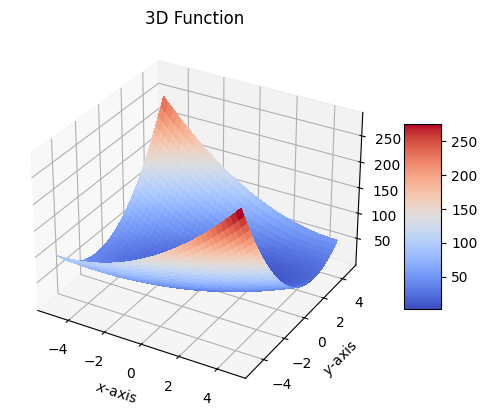

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
z = 2*x**2 - 4*x*y + 5*y**2 - 4*y + 3

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("3D Function")
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")



In [134]:
x = np.array([1,2], dtype=np.float64)


def f(x):
    return 2*x[0]**2 - 4*x[0]*x[1] + 5*x[1]**2 - 4*x[1] + 3


def g(x):
    return np.array([4*(x[0] - x[1]), -4*x[0] + 10*x[1] - 4])

def hf(x):
    return np.array([[4, -4], [-4, 10]])


minx, minf, grad, it = newton(f, g, hf, x, 1e-6, 10000)
print(
    f"Newton's Method\nMin x = {minx}\nMin value = {minf:.6}\nGradient: {grad:.6}\nIterations: {it}\n")
minx, minf, grad, it = gradient(f, g, x, 1e-6, 10000, 1/100)
print(
    f"Gradient Method\nMin x = {minx}\nMin value = {minf}\nGradient: {grad}\nIterations: {it}\n")


Newton's Method
Min x = [0.66666667 0.66666667]
Min value = 1.66667
Gradient: 8.88178e-16
Iterations: 1

Gradient Method
Min x = [0.66666716 0.66666691]
Min value = 1.666666666666968
Gradient: 1.0980865689998804e-06
Iterations: 708

